In [3]:
# Import libraries

# kaggle lib to download the dataset
import kaggle

# zipfile lib to unzip the dataset file
import zipfile

# or just use this command:
# !kaggle datasets download -d danielgrijalvas/movies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import figure

#import plotly and other plotly stuff 
import plotly.express as px
import plotly.graph_objects as go

# cufflinks lib to make pandas use plotly
import cufflinks as cf

# make plotly work in jupyter notebook
import plotly.offline as pyoff
pyoff.init_notebook_mode(connected=True)

# use plotly locally
cf.go_offline()

In [4]:
%matplotlib inline
plt.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (12, 8)    # adjust the configuration of of the plots we are gonna create

## Gettings the dataset

In [2]:
kaggle.api.dataset_download_files('danielgrijalvas/movies')

Dataset URL: https://www.kaggle.com/datasets/danielgrijalvas/movies


In [4]:
zipfile_name = 'movies.zip'
with zipfile.ZipFile(zipfile_name, 'r') as zipf:
    zipf.extractall()

## Read and Explore the data

In [13]:
df = pd.read_csv('movies.csv')

In [4]:
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country      budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000.0   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000.0   
2              Leigh Brackett       Mark Hamill   United States  18000000.0   
3                Jim Abrahams       Robert Hays   United States   3500000.0   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000.0   
...                       ...               ...             ...         ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000.0   
7664              Lisa Huston  Michael Saquella   United States         NaN   
7665             Lynno Lovert      Onyama Laura   United States     58750.0   
7666            James Randall     Christina Roz   United States     15000.0   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         NaN   

            gross                    company  runtime  
0      46998772.0               Warner Bros.    146.0  
1      58853106.0          Columbia Pictures    104.0  
2     538375067.0                  Lucasfilm    124.0  
3      83453539.0         Paramount Pictures     88.0  
4      39846344.0             Orion Pictures     98.0  
...           ...                        ...      ...  
7663          NaN                        NaN     90.0  
7664          NaN  Cactus Blue Entertainment     90.0  
7665          NaN           Embi Productions      NaN  
7666          NaN                        NaN    120.0  
7667          NaN                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [18]:
df.describe()

year        score         votes        budget         gross  \
count  7668.000000  7665.000000  7.665000e+03  5.497000e+03  7.479000e+03   
mean   2000.405451     6.390411  8.810850e+04  3.558988e+07  7.850054e+07   
std      11.153508     0.968842  1.633238e+05  4.145730e+07  1.657251e+08   
min    1980.000000     1.900000  7.000000e+00  3.000000e+03  3.090000e+02   
25%    1991.000000     5.800000  9.100000e+03  1.000000e+07  4.532056e+06   
50%    2000.000000     6.500000  3.300000e+04  2.050000e+07  2.020576e+07   
75%    2010.000000     7.100000  9.300000e+04  4.500000e+07  7.601669e+07   
max    2020.000000     9.300000  2.400000e+06  3.560000e+08  2.847246e+09   

           runtime  
count  7664.000000  
mean    107.261613  
std      18.581247  
min      55.000000  
25%      95.000000  
50%     104.000000  
75%     116.000000  
max     366.000000

In [28]:
# percent of null values in each column
print('percentage of null valuesin each column\n')
print(df.isnull().mean()*100)

percentage of null valuesin each column

name         0.000000
rating       1.004173
genre        0.000000
year         0.000000
released     0.026082
score        0.039124
votes        0.039124
director     0.000000
writer       0.039124
star         0.013041
country      0.039124
budget      28.312467
gross        2.464789
company      0.221701
runtime      0.052165
dtype: float64


In [42]:
# percent of null values in each column
for col in df.columns:
    print(f"{col} - {df[col].isnull().mean() * 100:.2f} %")

name - 0.00 %
rating - 1.00 %
genre - 0.00 %
year - 0.00 %
released - 0.03 %
score - 0.04 %
votes - 0.04 %
director - 0.00 %
writer - 0.04 %
star - 0.01 %
country - 0.04 %
budget - 28.31 %
gross - 2.46 %
company - 0.22 %
runtime - 0.05 %


## Looking for some movies i like out of curiosity

In [6]:
df[df['name'].str.contains('into the wild', case=False, regex=True)]

name rating      genre  year                          released  \
5052  Into the Wild      R  Adventure  2007  October 19, 2007 (United States)   

      score     votes   director     writer          star        country  \
5052    8.1  588000.0  Sean Penn  Sean Penn  Emile Hirsch  United States   

          budget       gross            company  runtime  
5052  15000000.0  56675895.0  Paramount Vantage    148.0

In [129]:
df[df['name'].str.contains('a separation', case=False, regex=True)]

name rating  genre  year               released  score   votes        director          writer          star country  budget     gross                     company  runtime
5903  A Separation  PG-13  Drama  2011  March 16, 2011 (Iran)    8.3  227000  Asghar Farhadi  Asghar Farhadi  Payman Maadi    Iran  500000  22926076  Asghar Farhadi Productions    123.0

## Data Cleaning

#### fill null values with approriate value

In [14]:
# fill budget null values with zero
df['budget'].fillna(0, inplace=True)

# fill gross null values with zero
df['gross'].fillna(0, inplace=True)

# fill votes null values with zero
df['votes'].fillna(0, inplace=True)

#### changing data types of columns to the appropriate types

In [38]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

**Remember: be very careful and remember that int64 is not the same as Int64. sns.regplot() down didn't work with Int64, but it worked fine with int64.**

In [16]:

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [11]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  
0   46998772        Warner Bros.    146.0  
1   58853106   Columbia Pictures    104.0  
2  538375067           Lucasfilm    124.0  
3   83453539  Paramount Pictures     88.0  
4   39846344      Orion Pictures     98.0

## Take a quick look at the data ranked by gross column

In [67]:
# to make pandas series or dataframe show all rows without limit 
pd.set_option('display.max_rows', 30)
# pd.set_option('display.width', 1000)

In [66]:
# this method didn't work to show the whole dataframe with scrollbar instead of showing all records without scrollbar
from IPython.display import display

In [23]:
# a simple test to see how the rank method work
pd.Series([1, 2, 2, 3, 4, 4, 4, 4, 5]).rank(method='dense').sort_values()

0    1.0
1    2.0
2    2.0
3    3.0
4    4.0
5    4.0
6    4.0
7    4.0
8    5.0
dtype: float64

In [20]:
# this method worked to show the whole dataframe with scrollbar instead of showing all records without scrollbar
# from IPython.display import display
from IPython.display import HTML

# make the rank column to add to the dataframe 
rank = df['gross'].rank(method='dense', ascending=False).sort_values().rename('Rank').astype('Int16')
df = df.sort_values(by='gross', inplace=False, ascending=False)

html = pd.concat([rank, df], axis='columns').to_html(max_rows=None)
HTML(f'<div style="height: 400px; overflow-y: scroll;">{html}</div>')

In [103]:
# hoe many rows with gross value equal to zero or with unknown gross value
(df['gross']==0).sum()

189

## Check the possible correlations between columns

#### Correlation Matrix Heatmap for numeric columns

In [7]:
correlation_matrix = df.corr(numeric_only=True, method='pearson').round(3)
correlation_matrix

year  score  votes  budget  gross  runtime
year     1.000  0.098  0.222   0.309  0.262    0.121
score    0.098  1.000  0.409   0.056  0.186    0.399
votes    0.222  0.409  1.000   0.487  0.633    0.309
budget   0.309  0.056  0.487   1.000  0.750    0.270
gross    0.262  0.186  0.633   0.750  1.000    0.245
runtime  0.121  0.399  0.309   0.270  0.245    1.000

In [17]:
px.imshow(correlation_matrix, text_auto=True, 
          color_continuous_scale=px.colors.sequential.Greens, 
          height=500, title='Correlation Metric for Numeric Features')

In [ ]:
# # same as the plot above but in different way, check them out if you want
# fig = go.Figure(go.Heatmap(z=correlation_matrix, x=correlation_matrix.columns, y=correlation_matrix.columns,
#                            colorscale=px.colors.sequential.Greens, 
#                            zmin=0, zmax=1,
#                            ))
# fig.update_yaxes(autorange='reversed')
# fig.update_layout(
#     title_text="Correlation Matrix Heatmap",
    
# )

In [ ]:
# # same as the plot above but in different way, check them out if you want
# sns.heatmap(correlation_matrix, annot=True, cmap='Greens')

#### Budget vs Gross

In [83]:
# Budget vs Gross 
# fig = df[['budget', 'gross']].scatter_matrix(bins=20, size=5)
# fig.update_layout(title='Budget')
# pd.plotting.scatter_matrix(df[['budget', 'gross']])
px.scatter(df, x='budget', y='gross', title='Budget vs Gross Earnings',
           hover_name='name')

In [ ]:
# sns.pairplot(df[['budget', 'gross']], diag_kind='hist', aspect=3, diag_kws=dict(bins=20))

Text(0.5, 1.0, 'Budget vs Gross')

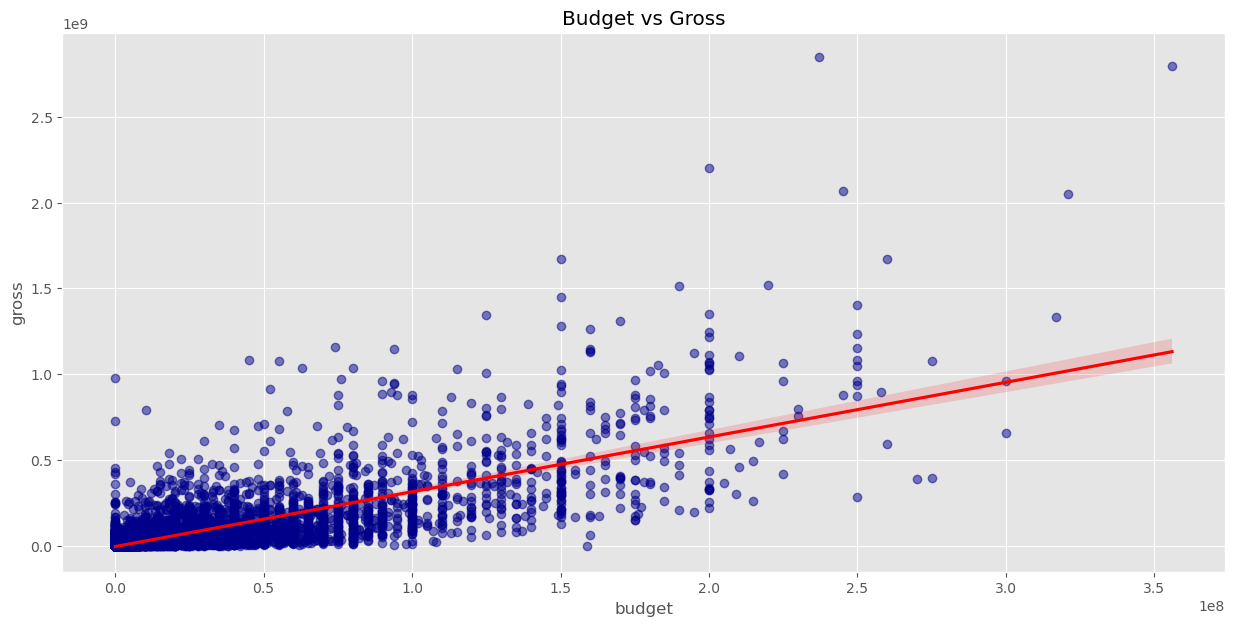

In [45]:
fig = plt.figure(figsize=(15, 7))
sns.regplot(data=df, x='budget', y='gross', scatter_kws=dict(color='darkblue', alpha=.5), line_kws=dict(color='red'))
plt.title('Budget vs Gross')

#### Change categorical text columns to numeric columns

In [42]:
# To extract certain data type fields from a dataframe, use select_dtypes()
# To extract object data type fields from the dataframe
df.select_dtypes(include='object').head()

name rating   genre  \
5445                                      Avatar  PG-13  Action   
7445                           Avengers: Endgame  PG-13  Action   
3045                                     Titanic  PG-13   Drama   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action   
7244                      Avengers: Infinity War  PG-13  Action   

                               released       director              writer  \
5445  December 18, 2009 (United States)  James Cameron       James Cameron   
7445     April 26, 2019 (United States)  Anthony Russo  Christopher Markus   
3045  December 19, 1997 (United States)  James Cameron       James Cameron   
6663  December 18, 2015 (United States)    J.J. Abrams     Lawrence Kasdan   
7244     April 27, 2018 (United States)  Anthony Russo  Christopher Markus   

                   star        country                company  
5445    Sam Worthington  United States  Twentieth Century Fox  
7445  Robert Downey Jr.  United States         Marvel Studios  
3045  Leonardo DiCaprio  United States  Twentieth Century Fox  
6663       Daisy Ridley  United States              Lucasfilm  
7244  Robert Downey Jr.  United States         Marvel Studios

In [8]:
# convert categorical text fields to numeric fields
df_numerized = df.copy(deep=True)

# extract taxt column names
txt_cols = df_numerized.select_dtypes(include=['object']).columns

# change their type to category  
df_numerized[txt_cols] = df_numerized[txt_cols].astype('category')

# change text to category codes
for col in txt_cols:
    df_numerized[col] = df_numerized[col].cat.codes
    
df_numerized.head()

name  rating  genre  year  released  score    votes  director  writer  \
5445   533       5      0  2009       696    7.8  1100000      1155    1778   
7445   535       5      0  2019       183    8.4   903000       162     743   
3045  6896       5      6  1997       704    7.8  1100000      1155    1778   
6663  5144       5      0  2015       698    7.8   876000      1125    2550   
7244   536       5      0  2018       192    8.4   897000       162     743   

      star  country     budget       gross  company  runtime  
5445  2334       55  237000000  2847246203     2253    162.0  
7445  2241       55  356000000  2797501328     1606    181.0  
3045  1595       55  200000000  2201647264     2253    194.0  
6663   524       55  245000000  2069521700     1540    138.0  
7244  2241       55  321000000  2048359754     1606    149.0

In [65]:
df_numerized[txt_cols].head()

name  rating  genre  released  director  writer  star  country  company
5445   533       5      0       696      1155    1778  2334       55     2253
7445   535       5      0       183       162     743  2241       55     1606
3045  6896       5      6       704      1155    1778  1595       55     2253
6663  5144       5      0       698      1125    2550   524       55     1540
7244   536       5      0       192       162     743  2241       55     1606

#### Correlation Matrix Heatmap for All columns

In [9]:
correlation_matrix = df_numerized.corr(numeric_only=True, method='pearson').round(3)
correlation_matrix

name  rating  genre   year  released  score  votes  director  \
name      1.000  -0.008  0.016  0.011    -0.011  0.017  0.013     0.009   
rating   -0.008   1.000  0.072  0.009     0.017 -0.001  0.034     0.019   
genre     0.016   0.072  1.000 -0.081     0.030  0.028 -0.145    -0.015   
year      0.011   0.009 -0.081  1.000    -0.001  0.098  0.222    -0.021   
released -0.011   0.017  0.030 -0.001     1.000  0.043  0.016    -0.001   
score     0.017  -0.001  0.028  0.098     0.043  1.000  0.409     0.010   
votes     0.013   0.034 -0.145  0.222     0.016  0.409  1.000     0.000   
director  0.009   0.019 -0.015 -0.021    -0.001  0.010  0.000     1.000   
writer    0.009  -0.006  0.007 -0.009    -0.002  0.019  0.001     0.299   
star      0.006   0.013 -0.005 -0.027     0.016 -0.002 -0.019     0.039   
country  -0.011   0.081 -0.038 -0.071    -0.020 -0.133  0.074     0.017   
budget    0.021  -0.082 -0.334  0.309     0.009  0.056  0.487     0.005   
gross     0.007  -0.095 -0.234  0.262     0.001  0.186  0.633    -0.015   
company   0.009  -0.033 -0.071 -0.010    -0.010  0.001  0.133     0.004   
runtime   0.010   0.062 -0.053  0.121     0.001  0.399  0.309     0.018   

          writer   star  country  budget  gross  company  runtime  
name       0.009  0.006   -0.011   0.021  0.007    0.009    0.010  
rating    -0.006  0.013    0.081  -0.082 -0.095   -0.033    0.062  
genre      0.007 -0.005   -0.038  -0.334 -0.234   -0.071   -0.053  
year      -0.009 -0.027   -0.071   0.309  0.262   -0.010    0.121  
released  -0.002  0.016   -0.020   0.009  0.001   -0.010    0.001  
score      0.019 -0.002   -0.133   0.056  0.186    0.001    0.399  
votes      0.001 -0.019    0.074   0.487  0.633    0.133    0.309  
director   0.299  0.039    0.017   0.005 -0.015    0.004    0.018  
writer     1.000  0.027    0.015  -0.026 -0.023    0.006   -0.004  
star       0.027  1.000   -0.013  -0.020 -0.001    0.012    0.010  
country    0.015 -0.013    1.000   0.132  0.095    0.096   -0.078  
budget    -0.026 -0.020    0.132   1.000  0.750    0.186    0.270  
gross     -0.023 -0.001    0.095   0.750  1.000    0.157    0.245  
company    0.006  0.012    0.096   0.186  0.157    1.000    0.034  
runtime   -0.004  0.010   -0.078   0.270  0.245    0.034    1.000

In [78]:
fig = px.imshow(correlation_matrix, text_auto=True, 
          color_continuous_scale=px.colors.diverging.RdGy_r, 
          zmin= -1, zmax= 1, contrast_rescaling=True,
          height=800, title='Correlation Metric for All Features')
fig.update_xaxes(tickangle= -45)

In [ ]:
# # same as the plot above but in different way, check them out if you want
# fig = go.Figure(go.Heatmap(z=correlation_matrix, x=correlation_matrix.columns, y=correlation_matrix.columns,
#                            colorscale=px.colors.sequential.Greens, 
#                            zmin=-1, zmax=1,
#                            ))
# fig.update_yaxes(autorange='reversed')
# fig.update_layout(
#     title_text="Correlation Matrix Heatmap",
    
# )

In [ ]:
# # same as the plot above but in different way, check them out if you want
# sns.heatmap(correlation_matrix, annot=True, cmap='Greens')

In [21]:
corr_pairs = correlation_matrix.stack()
# html = corr_pairs.to_html(max_rows=None)
# HTML(f'<div style="height: 400px; overflow-y: scroll;">{html}</div>')
corr_pairs

name      name        1.000
          rating     -0.008
          genre       0.016
          year        0.011
          released   -0.011
          score       0.017
          votes       0.013
          director    0.009
          writer      0.009
          star        0.006
          country    -0.011
          budget      0.021
          gross       0.007
          company     0.009
          runtime     0.010
rating    name       -0.008
          rating      1.000
          genre       0.072
          year        0.009
          released    0.017
          score      -0.001
          votes       0.034
          director    0.019
          writer     -0.006
          star        0.013
          country     0.081
          budget     -0.082
          gross      -0.095
          company    -0.033
          runtime     0.062
genre     name        0.016
          rating      0.072
          genre       1.000
          year       -0.081
          released    0.030
          score     

In [23]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre     budget     -0.334
budget    genre      -0.334
genre     gross      -0.234
gross     genre      -0.234
genre     votes      -0.145
votes     genre      -0.145
country   score      -0.133
score     country    -0.133
gross     rating     -0.095
rating    gross      -0.095
          budget     -0.082
budget    rating     -0.082
genre     year       -0.081
year      genre      -0.081
runtime   country    -0.078
country   runtime    -0.078
year      country    -0.071
genre     company    -0.071
company   genre      -0.071
country   year       -0.071
genre     runtime    -0.053
runtime   genre      -0.053
genre     country    -0.038
country   genre      -0.038
company   rating     -0.033
rating    company    -0.033
star      year       -0.027
year      star       -0.027
budget    writer     -0.026
writer    budget     -0.026
gross     writer     -0.023
writer    gross      -0.023
director  year       -0.021
year      director   -0.021
star      budget     -0.020
country   released  

In [33]:
high_corr = sorted_pairs[((sorted_pairs >= 0.5) & (sorted_pairs != 1))]
high_corr

votes   gross     0.633
gross   votes     0.633
        budget    0.750
budget  gross     0.750
dtype: float64

## Visualizations

In [97]:
df_viz = df.copy(deep=True)[['year', 'gross', 'budget', 'country']].sort_values(by=['year', 'country']).groupby(by=['year', 'country'])['gross'].sum().unstack(level=-1).fillna(0).reset_index().drop_duplicates()
start = 0
obs = len(df_viz)

# new datastructure for animation
df_try = pd.DataFrame() # container for df_try with new datastructure
for i in np.arange(start,obs):
    dfa = df_viz.head(i).copy()
    dfa['ix']=i
    df_try = pd.concat([df_try, dfa])

# df_try.drop_duplicates(subset=['year'], inplace=True)
# plotly figure
fig = px.line(df_try, x = 'year', y = ['United States', 'United Kingdom', 'France'],
              animation_frame='ix',
              template = 'plotly_dark',
              width=1000, height=600)

# attribute adjusments
fig.layout.updatemenus[0].buttons[0]['args'][1]['frame']['redraw'] = True
fig.show()

In [98]:
df_try

country  year  Argentina  Aruba    Australia  Austria  Belgium  Brazil  \
0        1980        0.0    0.0          0.0      0.0      0.0     0.0   
0        1980        0.0    0.0          0.0      0.0      0.0     0.0   
1        1981        0.0    0.0   29637956.0      0.0      0.0     0.0   
0        1980        0.0    0.0          0.0      0.0      0.0     0.0   
1        1981        0.0    0.0   29637956.0      0.0      0.0     0.0   
..        ...        ...    ...          ...      ...      ...     ...   
35       2015        0.0    0.0  402167610.0      0.0      0.0     0.0   
36       2016        0.0    0.0  181390276.0      0.0      0.0     0.0   
37       2017        0.0    0.0    3720262.0      0.0      0.0     0.0   
38       2018        0.0    0.0   89178810.0      0.0      0.0     0.0   
39       2019   103047.0    0.0    4393018.0  29251.0      0.0     0.0   

country       Canada       Chile         China  ...  Taiwan  Thailand  \
0         14855403.0         0.0  0.000000e+00  ...     0.0       0.0   
0         14855403.0         0.0  0.000000e+00  ...     0.0       0.0   
1        160665191.0         0.0  0.000000e+00  ...     0.0       0.0   
0         14855403.0         0.0  0.000000e+00  ...     0.0       0.0   
1        160665191.0         0.0  0.000000e+00  ...     0.0       0.0   
..               ...         ...           ...  ...     ...       ...   
35       268010724.0  27972023.0  4.482854e+08  ...     0.0   98932.0   
36       461425241.0         0.0  6.243526e+08  ...     0.0       0.0   
37       115993473.0         0.0  1.641407e+09  ...     0.0       0.0   
38       981897882.0  11145006.0  1.418614e+09  ...     0.0       0.0   
39       295051558.0         0.0  3.396005e+09  ...     0.0  345900.0   

country     Turkey  United Arab Emirates  United Kingdom  United States  \
0              0.0                   0.0    5.552363e+07   2.356312e+09   
0              0.0                   0.0    5.552363e+07   2.356312e+09   
1              0.0                   0.0    4.089713e+08   1.878361e+09   
0              0.0                   0.0    5.552363e+07   2.356312e+09   
1              0.0                   0.0    4.089713e+08   1.878361e+09   
..             ...                   ...             ...            ...   
35       5274664.0                   0.0    2.484155e+09   2.238756e+10   
36             0.0                   0.0    2.950741e+09   2.312854e+10   
37             0.0            40656399.0    2.692909e+09   2.267693e+10   
38             0.0                   0.0    3.193574e+09   2.093133e+10   
39             0.0                   0.0    1.900223e+09   2.283395e+10   

country    Vietnam  West Germany  Yugoslavia  ix  
0              0.0    19814523.0         0.0   1  
0              0.0    19814523.0         0.0   2  
1              0.0    23864301.0         0.0   2  
0              0.0    19814523.0         0.0   3  
1              0.0    23864301.0         0.0   3  
..             ...           ...         ...  ..  
35             0.0           0.0         0.0  40  
36             0.0           0.0         0.0  40  
37             0.0           0.0         0.0  40  
38             0.0           0.0         0.0  40  
39       5756185.0           0.0         0.0  40  

[820 rows x 61 columns]

In [77]:
dfff = df_viz.copy()
np.sort(dfff['year'].unique())

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [38]:
df_viz = df.copy(deep=True)[['year', 'gross', 'budget', 'country']].sort_values(by=['country', 'year']).groupby(by=['year', 'country']).sum().unstack(level=-1).fillna(0).reset_index()
html = df_viz.to_html(max_rows=None)
HTML(f'<div style="height: 400px; overflow-y: scroll;">{html}</div>')

In [24]:
df_viz

year  country              
1980  Australia      gross              0
                     budget             0
      Canada         gross       14855403
                     budget       5100000
      France         gross        7117576
                                  ...    
2020  China          budget      80000000
      South Africa   gross              0
                     budget             0
      United States  gross     1866138705
                     budget     640965750
Length: 1318, dtype: int64

In [12]:
# input data
dfi = px.data.stocks().head(50)
dfi['date'] = pd.to_datetime(dfi['date'])
start = 12
obs = len(dfi)

# new datastructure for animation
df_try = pd.DataFrame() # container for df_try with new datastructure
for i in np.arange(start,obs):
    dfa = dfi.head(i).copy()
    dfa['ix']=i
    df_try = pd.concat([df_try, dfa])

# plotly figure
fig = px.line(df_try, x = 'date', y = ['GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'MSFT'],
              animation_frame='ix',
              # template = 'plotly_dark',
              width=1000, height=600)

# attribute adjusments
fig.layout.updatemenus[0].buttons[0]['args'][1]['frame']['redraw'] = True
fig.show()

In [116]:
df.groupby(by=['year', 'country'])['gross'].sum()[2019, 'United States'].sum()

22833949749